In [1]:
pip install numpy


In [ ]:
pip install scipy

In [ ]:
pip install matplotlib

In [ ]:
pip install pandas

In [ ]:
pip install librosa

In [ ]:
pip install soundfile

In [ ]:
pip install sklearn

In [ ]:
pip install PyAudio-0.2.11-cp39-cp39-win_amd64.whl

In [1]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
        return result

In [3]:
# Emotions in the RAVDESS dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

#Emotions to observe
observed_emotions=['neutral','calm', 'happy','sad','angry', 'fearful', 'disgust','surprised']

In [4]:
# Load the data and extract features for each sound file
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob(r"C:\Users\user\Desktop\project\Actor_01\*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
      
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [5]:
#Split the dataset
x_train,x_test,y_train,y_test=load_data(test_size=0.25)

In [6]:
x_train

array([[-6.35043030e+02,  4.89170494e+01,  2.69723988e+00, ...,
         4.33579880e-05,  2.98165578e-05,  9.39764050e-06],
       [-6.81900757e+02,  5.79794273e+01, -2.53184676e+00, ...,
         1.83257578e-06,  1.72442651e-06,  1.55011003e-06],
       [-4.81413239e+02,  4.03593674e+01, -1.13141022e+01, ...,
         1.56979309e-03,  8.16480839e-04,  3.50297749e-04],
       ...,
       [-6.52898743e+02,  5.08731918e+01, -3.63475770e-01, ...,
         1.58284038e-05,  8.89249895e-06,  3.39575672e-06],
       [-6.67963989e+02,  4.68550148e+01, -4.50245190e+00, ...,
         2.10676944e-06,  1.74689990e-06,  1.47956359e-06],
       [-5.33920776e+02,  3.48088074e+01, -3.42611265e+00, ...,
         3.16682097e-04,  1.18458163e-04,  7.22087862e-05]])

In [7]:
# Get the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))

(45, 15)


In [8]:
# Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


In [9]:
# Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=24, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)


In [10]:
#Train the model
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=24, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [11]:
#Predict for the test set
y_pred=model.predict(x_test)

In [12]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       1.00      1.00      1.00         2
        calm       1.00      1.00      1.00         3
     disgust       1.00      1.00      1.00         2
     fearful       1.00      0.33      0.50         3
       happy       0.33      0.50      0.40         2
     neutral       1.00      1.00      1.00         1
         sad       1.00      1.00      1.00         2
   surprised       0.00      0.00      0.00         0

    accuracy                           0.80        15
   macro avg       0.79      0.73      0.74        15
weighted avg       0.91      0.80      0.82        15



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
# Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

In [15]:
#Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 80.00%


In [16]:
from sklearn.metrics import accuracy_score, f1_score

In [17]:
f1_score(y_test, y_pred,average=None)

array([1. , 1. , 1. , 0.5, 0.4, 1. , 1. , 0. ])

In [18]:
import pandas as pd
df=pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df.head(80)

,Actual,Predicted
0,angry,angry
1,happy,happy
2,calm,calm
3,calm,calm
4,fearful,happy
5,neutral,neutral
6,fearful,fearful
7,fearful,happy
8,sad,sad
9,disgust,disgust


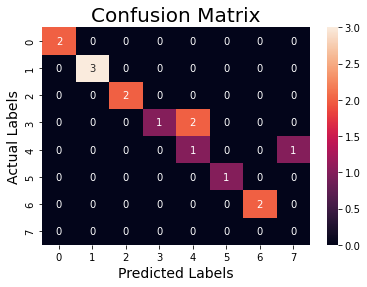

In [19]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
sns.heatmap(df_cm, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.savefig('initial_Model_Confusion_matrix.png')
plt.show()